## Data inspection of the real propecty sales file

File name: Real Property Sales <br> 
Location: Documents/Data Science/Fatiron School/week3/

## Step 1: Inspecting the files content

In [1]:
## Import pandas and inspect the content of the data using a DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
sales_df = pd.read_csv('raw_data/Real Property Sales.zip')
sales_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [3]:
bldg_df = pd.read_csv('raw_data/Residential Building.zip')
bldg_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,520,67,1,1,6781 MARS AVE S 98108,6781,,,MARS,AVE,...,1,0,1,1940,2014,0,0,0,3,0
1,640,7,1,1,45216 196TH AVE SE 98022,45216,,,196TH,AVE,...,1,0,0,1961,0,0,0,0,4,0
2,640,16,1,1,20410 SE 456TH WAY 98022,20410,,SE,456TH,WAY,...,0,0,0,2004,0,0,0,0,3,0
3,660,96,1,1,8501 S 259TH ST 98030,8501,,S,259TH,ST,...,0,0,0,1933,0,0,0,0,4,0
4,720,13,1,1,84 LOGAN AVE S 98055,84,,,LOGAN,AVE,...,0,0,0,1924,0,0,0,0,3,0


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 372.3+ MB


In [5]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512548 entries, 0 to 512547
Data columns (total 50 columns):
Major                 512548 non-null int64
Minor                 512548 non-null int64
BldgNbr               512548 non-null int64
NbrLivingUnits        512548 non-null int64
Address               512548 non-null object
BuildingNumber        512548 non-null object
Fraction              512548 non-null object
DirectionPrefix       511984 non-null object
StreetName            512548 non-null object
StreetType            512548 non-null object
DirectionSuffix       511984 non-null object
ZipCode               468452 non-null object
Stories               512548 non-null float64
BldgGrade             512548 non-null int64
BldgGradeVar          512548 non-null int64
SqFt1stFloor          512548 non-null int64
SqFtHalfFloor         512548 non-null int64
SqFt2ndFloor          512548 non-null int64
SqFtUpperFloor        512548 non-null int64
SqFtUnfinFull         512548 non-null int64

## Step 2: Reducing the data frames to include the relevant factors

In [6]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice', 'PrincipalUse']]
sales_df.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse
0,138860,110,08/21/2014,245000,6
1,664885,40,07/09/1991,0,0
2,423943,50,10/11/2014,0,6
3,403700,715,01/04/2013,0,6
4,951120,900,04/20/1989,85000,0


In [7]:
bldg_df = bldg_df[['Major', 'Minor', 'ZipCode', 'BldgGrade', 'SqFtTotLiving', 'Bedrooms', 'BathHalfCount'
                   , 'Bath3qtrCount', 'BathFullCount', 'YrBuilt', 'YrRenovated']]
bldg_df.head()

,Major,Minor,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,520,67,98108,7,2360,3,0,1,2,1940,2014
1,640,7,98022,6,1770,3,1,0,1,1961,0
2,640,16,98022,9,2720,3,1,0,3,2004,0
3,660,96,98030,7,1360,4,0,0,1,1933,0
4,720,13,98055,6,1270,3,0,0,1,1924,0


## Step 3: Merging the data frames together

In [8]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

In [9]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 5 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
PrincipalUse    int64
dtypes: float64(2), int64(2), object(1)
memory usage: 77.6+ MB


In [11]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [12]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,08/21/2014,245000,6,98002,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,06/12/1989,109300,0,98002,7,1490,3,0,0,2,1989,0
2,138860.0,110.0,01/16/2005,14684,6,98002,7,1490,3,0,0,2,1989,0
3,138860.0,110.0,06/08/2005,0,0,98002,7,1490,3,0,0,2,1989,0
4,423943.0,50.0,10/11/2014,0,6,98092,6,960,3,0,0,1,1969,0


## Step 4: Data cleaning

<b> Step 4.1 :  Look for nulls and decide on their outcome

In [13]:
sales_data.isna().any()

Major            False
Minor            False
DocumentDate     False
SalePrice        False
PrincipalUse     False
ZipCode           True
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathHalfCount    False
Bath3qtrCount    False
BathFullCount    False
YrBuilt          False
YrRenovated      False
dtype: bool

So far we have found that ZipCode contains null values, so we are going to investigate that column further

In [14]:
sales_data['ZipCode'].unique()

array(['98002', '98092', '98008', '98058', '98038', '98031', '98188',
       '98051', '98001', 98001.0, '98177', '98072', '98106', nan, '98059',
       98125.0, 98006.0, '98144', '98006', '98040', '98070', '98155',
       '98045', '98133', '98118', 98105.0, '98056', '98102', '98042',
       '98053', '98199', '98168', '98027', '98011', '98115', '98074',
       '98003', '98146', '98024', '98117', '98029', '98005', '98028',
       '98103', '98034', '98030', '98032', '98039', '98075', '98022',
       '98108', '98198', 98115.0, '98065', '98105', '98166', 98074.0,
       '98136', '98125', '98023', '98004', '98055', '98033', '98077',
       '98119', '98122', '98116', '98052', 98136.0, '98112', '98007',
       '98107', '98010', 98038.0, 98103.0, 98019.0, '98014', 98055.0,
       '98019', '98178', 98059.0, 98008.0, 98024.0, 98023.0, 98106.0,
       98122.0, 98031.0, '98126', 98117.0, '98148', 98030.0, 98034.0,
       '98047', '98288', '98109', 98052.0, 98003.0, 98011.0, '98224',
       98133.0,

Apart from the null values, there are string values that don't relate to particular ZipCodes (ie. 0, A, B, WA). Given that the data is categorical, we are going to turn these values into nulls and the zip codes.

In [15]:
def clean_zips(x):
    x = str(x)
    if len(x) >= 5 and x[:2] == '98':
        x = x[:5]
        return int(x)
    else:
        return np.nan

sales_data['ZipCode'] = sales_data['ZipCode'].apply(clean_zips)
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,08/21/2014,245000,6,98002.0,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,06/12/1989,109300,0,98002.0,7,1490,3,0,0,2,1989,0
2,138860.0,110.0,01/16/2005,14684,6,98002.0,7,1490,3,0,0,2,1989,0
3,138860.0,110.0,06/08/2005,0,0,98002.0,7,1490,3,0,0,2,1989,0
4,423943.0,50.0,10/11/2014,0,6,98092.0,6,960,3,0,0,1,1969,0


In [16]:
sales_data['ZipCode'].isna().sum()

118440

In [17]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

<b> Step 4.2 :  Drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

In [18]:
sales_data = sales_data.loc[~(sales_data['SalePrice'] <= 0), :]

In [19]:
sales_data = sales_data.loc[~(sales_data['SqFtTotLiving'] == 0), :]

<b> Step 4.3 :  Subseting the SalePrice for our model to reflect best the sale price of a house for an average customer more accurately.

In [20]:
lowest = np.percentile(sales_data['SalePrice'],10)
highest = np.percentile(sales_data['SalePrice'],90)

In [21]:
sales_data = sales_data[sales_data['SalePrice'] > lowest]
sales_data = sales_data[sales_data['SalePrice'] < highest]

<b> Step 4.4 : Drop properties whose principal use is not either Residential, Condominiums, Apartments and Mobile Homes

In [22]:
a = [0, 2, 4, 6, 8]
sales_data = sales_data[sales_data['PrincipalUse'].isin(a)]

In [23]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,08/21/2014,245000,6,98002.0,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,06/12/1989,109300,0,98002.0,7,1490,3,0,0,2,1989,0
7,423943.0,50.0,01/08/2001,127500,6,98092.0,6,960,3,0,0,1,1969,0
11,403700.0,715.0,07/03/2013,464500,6,98008.0,7,1780,4,0,1,1,1957,0
12,403700.0,715.0,02/21/2013,357000,6,98008.0,7,1780,4,0,1,1,1957,0


In [24]:
sales_data.drop("PrincipalUse", axis=1, inplace=True)## Dropping PrincipalUse column since it is no longer useful

<b> Step 4.5 : Drop BathHalfCount and Bath3qrtCount given that a merge of these fields would lead to an inacurrate predictor

In [25]:
sales_data.drop(columns=['BathHalfCount', 'Bath3qtrCount'], axis=1, inplace=True)

<b> Step 4.6 : Find out the number of years the house has been built.

In [26]:
sales_data['DocumentDate'] = sales_data['DocumentDate'].apply(pd.Timestamp)

In [28]:
sales_data['Year'] = sales_data['DocumentDate'].apply(lambda ts: ts.year)

In [29]:
sales_data['AgeofHouse'] = sales_data['Year'] - sales_data['YrBuilt']

<b> Step 5.6: Checking for outliers

(array([137329., 130809., 111393.,  92217.,  69868.,  49615.,  37416.,
         28560.,  23488.,  17418.]),
 array([103752. , 168376.7, 233001.4, 297626.1, 362250.8, 426875.5,
        491500.2, 556124.9, 620749.6, 685374.3, 749999. ]),
 <a list of 10 Patch objects>)

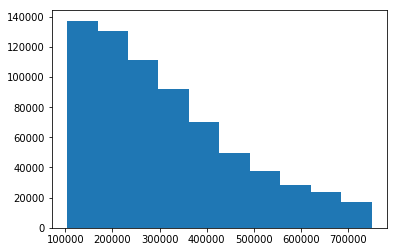

In [30]:
plt.hist(sales_data['SalePrice'])

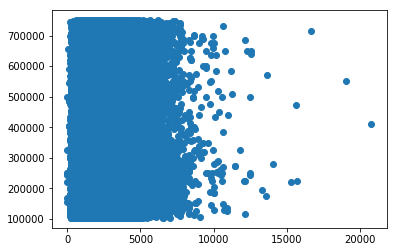

In [31]:
plt.scatter(sales_data['SqFtTotLiving'],sales_data['SalePrice'])

<b>Step 5.7: Re-checking for nulls

In [32]:
sales_data.isna().any()

Major            False
Minor            False
DocumentDate     False
SalePrice        False
ZipCode          False
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathFullCount    False
YrBuilt          False
YrRenovated      False
Year             False
AgeofHouse       False
dtype: bool

## Step 6: Running correlation between predictors and target variable

In [33]:
sales_data.corr()

,Major,Minor,SalePrice,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Year,AgeofHouse
Major,1.000000,-0.292808,0.017240,-0.004123,0.015399,-0.010001,0.002545,0.013313,0.014923,-0.019273,0.005644,-0.012750
Minor,-0.292808,1.000000,0.012427,0.000086,-0.024628,0.049471,-0.029577,-0.008144,-0.034090,0.053448,0.009199,0.035347
SalePrice,0.017240,0.012427,1.000000,-0.000724,0.357672,0.336664,0.155276,0.198483,0.101997,0.031051,0.537987,0.053470
ZipCode,-0.004123,0.000086,-0.000724,1.000000,-0.188374,-0.164495,-0.120710,-0.113603,-0.380117,0.071907,0.043863,0.377598
BldgGrade,0.015399,-0.024628,0.357672,-0.188374,1.000000,0.727375,0.346175,0.434888,0.440051,0.001623,-0.174828,-0.472063
SqFtTotLiving,-0.010001,0.049471,0.336664,-0.164495,0.727375,1.000000,0.583324,0.527193,0.325761,0.065541,-0.147595,-0.354576
Bedrooms,0.002545,-0.029577,0.155276,-0.120710,0.346175,0.583324,1.000000,0.397886,0.177480,0.018738,-0.059611,-0.187322
BathFullCount,0.013313,-0.008144,0.198483,-0.113603,0.434888,0.527193,0.397886,1.000000,0.372036,0.054901,-0.047055,-0.370732
YrBuilt,0.014923,-0.034090,0.101997,-0.380117,0.440051,0.325761,0.177480,0.372036,1.000000,-0.234007,0.004758,-0.959544
YrRenovated,-0.019273,0.053448,0.031051,0.071907,0.001623,0.065541,0.018738,0.054901,-0.234007,1.000000,-0.005441,0.223321


Given that the calculated parameter AgeofHouse is not correlated to SalePrice, we are going to eliminate it from the model.

In [34]:
sales_data.drop(columns=['AgeofHouse'], axis=1, inplace=True)

Moreover, the correlation shows that ZipCodes aren't correlated to SalePrice. However, we know that can't be true because location is almost always the most important parameter when calculating the SalePrice of a house. Therefore, we are going to use one hot encoding to turn numerical categorical data into features with nominal value.

## Step 7: Dumming the ZipCodes column

In [66]:
from sklearn.preprocessing import OneHotEncoder

sales_dfwm = sales_data

<b>7.1 Experimenting with grouping ZipCodes into cities

king_zipcode_data = pd.read_csv('raw_data/king_zipcode.csv')

king_zipcode_data.head()

king_zipcode_data.drop(columns=['State', 'County Name', 'Zipcode name'], axis=1, inplace=True)

king_zipcode_data = king_zipcode_data.rename(columns={'Zipcode': 'ZipCode'})

sales_data = pd.merge(sales_data, king_zipcode_data, on=['ZipCode'], how='left')

sales_data.head()

sales_data[sales_data['City'].isnull()]

sales_data = sales_data.loc[~sales_data['City'].isna(), :]

sales_data['City'].value_counts()

zipcodes = sales_data["City"].values.reshape(-1, 1)
zipcodes[:10]

encoder = OneHotEncoder().fit(zipcodes)

Since one hot conder doesn't take in null values, we decide to drop them from the ZipCode list

encoder.categories_

ohe = pd.DataFrame(encoder.transform(zipcodes).toarray(),
                   columns=encoder.get_feature_names(["City"]))

ohe.head()

sales_data = sales_data.drop("City", axis=1)

sales_data = pd.concat([sales_data, ohe], axis=1)

sales_data.head()

sales_data.corr()['SalePrice']

<b> 7.2: ZipCode Exploration

In [36]:
sales_data["ZipCode"].value_counts()

98042.0    23408
98023.0    21450
98115.0    19466
98038.0    19455
98034.0    18418
98052.0    18117
98058.0    18100
98117.0    16738
98103.0    16447
98006.0    15801
98133.0    15530
98118.0    14641
98074.0    14636
98155.0    14503
98031.0    14311
98001.0    14073
98059.0    13648
98056.0    13317
98092.0    13306
98125.0    12884
98033.0    12765
98003.0    12444
98030.0    11185
98168.0    11064
98198.0    10976
98008.0    10107
98075.0     9949
98178.0     9887
98126.0     9846
98029.0     9721
           ...  
98050.0      193
98057.0      157
98224.0      150
98068.0      135
98000.0       45
98113.0       15
98134.0       10
98104.0        5
98422.0        4
98083.0        4
98097.0        4
98043.0        3
98189.0        3
98157.0        3
98121.0        3
98035.0        3
98017.0        2
98111.0        2
98009.0        2
98079.0        2
98132.0        2
98063.0        2
98302.0        2
98101.0        1
98018.0        1
98021.0        1
98026.0        1
98176.0       

In [38]:
sales_data["ZipCode"].unique()

array([98002., 98092., 98008., 98058., 98038., 98031., 98188., 98051.,
       98001., 98072., 98106., 98059., 98125., 98006., 98144., 98070.,
       98155., 98045., 98133., 98118., 98105., 98056., 98102., 98042.,
       98053., 98168., 98027., 98011., 98115., 98074., 98003., 98024.,
       98117., 98029., 98005., 98028., 98103., 98034., 98030., 98032.,
       98075., 98022., 98040., 98199., 98177., 98108., 98065., 98166.,
       98136., 98023., 98055., 98033., 98077., 98119., 98122., 98116.,
       98146., 98052., 98112., 98007., 98107., 98004., 98198., 98010.,
       98019., 98014., 98178., 98126., 98148., 98047., 98109., 98224.,
       98354., 98068., 98288., 98039., 98050., 98083., 98057., 98302.,
       98121., 98113., 98000., 98035., 98134., 98422., 98132., 98104.,
       98026., 98043., 98157., 98097., 98189., 98017., 98111., 98018.,
       98079., 98021., 98009., 98063., 98013., 98176., 98101., 98054.])

In [39]:
zipcodes = sales_dfwm["ZipCode"].values.reshape(-1, 1)
zipcodes[:10]

array([[98002.],
       [98002.],
       [98092.],
       [98008.],
       [98008.],
       [98008.],
       [98008.],
       [98058.],
       [98058.],
       [98038.]])

In [43]:
zipcodes = sales_dfwm["ZipCode"].values.reshape(-1, 1)

In [44]:
encoder = OneHotEncoder().fit(zipcodes)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [45]:
encoder.categories_

[array([98000., 98001., 98002., 98003., 98004., 98005., 98006., 98007.,
        98008., 98009., 98010., 98011., 98013., 98014., 98017., 98018.,
        98019., 98021., 98022., 98023., 98024., 98026., 98027., 98028.,
        98029., 98030., 98031., 98032., 98033., 98034., 98035., 98038.,
        98039., 98040., 98042., 98043., 98045., 98047., 98050., 98051.,
        98052., 98053., 98054., 98055., 98056., 98057., 98058., 98059.,
        98063., 98065., 98068., 98070., 98072., 98074., 98075., 98077.,
        98079., 98083., 98092., 98097., 98101., 98102., 98103., 98104.,
        98105., 98106., 98107., 98108., 98109., 98111., 98112., 98113.,
        98115., 98116., 98117., 98118., 98119., 98121., 98122., 98125.,
        98126., 98132., 98133., 98134., 98136., 98144., 98146., 98148.,
        98155., 98157., 98166., 98168., 98176., 98177., 98178., 98188.,
        98189., 98198., 98199., 98224., 98288., 98302., 98354., 98422.])]

In [67]:
ohe = pd.DataFrame(encoder.transform(zipcodes).toarray(),
                   columns=encoder.get_feature_names(["ZipCode"]))

ohe.head()

,ZipCode_98000.0,ZipCode_98001.0,ZipCode_98002.0,ZipCode_98003.0,ZipCode_98004.0,ZipCode_98005.0,ZipCode_98006.0,ZipCode_98007.0,ZipCode_98008.0,ZipCode_98009.0,...,ZipCode_98178.0,ZipCode_98188.0,ZipCode_98189.0,ZipCode_98198.0,ZipCode_98199.0,ZipCode_98224.0,ZipCode_98288.0,ZipCode_98302.0,ZipCode_98354.0,ZipCode_98422.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
sales_dfwm = sales_dfwm.drop(columns=["ZipCode"])

KeyError: "['ZipCode'] not found in axis"

In [83]:
sales_dfwm.shape

(698113, 11)

In [82]:
ohe.shape

(698113, 104)

In [71]:
sales_wm = pd.concat([sales_dfwm, ohe], axis=1)

In [72]:
sales_dfwm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698113 entries, 0 to 1451790
Data columns (total 11 columns):
Major            698113 non-null float64
Minor            698113 non-null float64
DocumentDate     698113 non-null datetime64[ns]
SalePrice        698113 non-null int64
BldgGrade        698113 non-null int64
SqFtTotLiving    698113 non-null int64
Bedrooms         698113 non-null int64
BathFullCount    698113 non-null int64
YrBuilt          698113 non-null int64
YrRenovated      698113 non-null int64
Year             698113 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 83.9 MB


In [74]:
sales_wm.dropna()

,Major,Minor,DocumentDate,SalePrice,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,...,ZipCode_98178.0,ZipCode_98188.0,ZipCode_98189.0,ZipCode_98198.0,ZipCode_98199.0,ZipCode_98224.0,ZipCode_98288.0,ZipCode_98302.0,ZipCode_98354.0,ZipCode_98422.0
0,138860.0,110.0,2014-08-21,245000.0,7.0,1490.0,3.0,2.0,1989.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,138860.0,110.0,1989-06-12,109300.0,7.0,1490.0,3.0,2.0,1989.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,423943.0,50.0,2001-01-08,127500.0,6.0,960.0,3.0,1.0,1969.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,403700.0,715.0,2013-07-03,464500.0,7.0,1780.0,4.0,1.0,1957.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,403700.0,715.0,2013-02-21,357000.0,7.0,1780.0,4.0,1.0,1957.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,403700.0,715.0,1995-10-13,142000.0,7.0,1780.0,4.0,1.0,1957.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,403700.0,715.0,2007-02-22,528000.0,7.0,1780.0,4.0,1.0,1957.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,98400.0,380.0,1994-03-23,139950.0,7.0,2050.0,4.0,1.0,1967.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,98400.0,380.0,2017-03-29,439500.0,7.0,2050.0,4.0,1.0,1967.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,330395.0,1610.0,2012-06-07,335000.0,8.0,2210.0,3.0,2.0,1994.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
sales_wm.shape

(328073, 115)

In [ ]:
sales_data.head()

In [ ]:
sales_data.corr()['SalePrice']

## Step 8: Running a simple linear regression

In [ ]:
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(sales_data.corr())

In [ ]:
sales_data.isnull()

<b>7.1 Multiple Linear Regression Using OLS In Statsmodel

In [ ]:
X = sales_data.drop(columns=['SalePrice', 'Major', 'Minor', 'DocumentDate'])
y = sales_data['SalePrice']

In [ ]:
predictors = np.asarray(X)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<b>7.2 Multiple Linear Regression Using Sklearn

In [ ]:
np.random.seed(33)

# Now let's split our data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [ ]:
X_train.sample(5)

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit_transform() method.

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)

In [ ]:
# Now we can fit the LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
lr.score(ss.transform(X_test), y_test)

In [ ]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

<b> SKlearn Metrics

In [ ]:
metrics.r2_score(y_test, lr.predict(ss.transform(X_test)))

In [ ]:
metrics.mean_absolute_error(y_test, lr.predict(ss.transform(X_test)))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(ss.transform(X_test))))